# Task 4: To Explore Decision Tree Algorithm

In [29]:
#Installing required libraries
!pip install pydotplus
!pip install graphviz
!pip install dtreeviz

In [30]:
#Importing all the libraries and modules needed to complete this task
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydotplus
from dtreeviz.trees import dtreeviz
%matplotlib inline

In [31]:
# Loading the iris dataset into pandas dataframe
df=pd.read_csv('C:/Users/Souvik/Desktop/tsf/Iris.csv')
# displaying the first 10 rows of the dataframe
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [32]:
#displaying the number of rows and columns of the dataframe
df.shape
#RESULT: There are 150 rows and 6 columns

(150, 6)

In [33]:
#checking for null values in the dataframe
df.isnull().sum()
#RESULT: There are no null values in the dataframe

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [34]:
#displaying the names of the columns of the dataframe
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [35]:
#basic statistical information of the dataframe
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


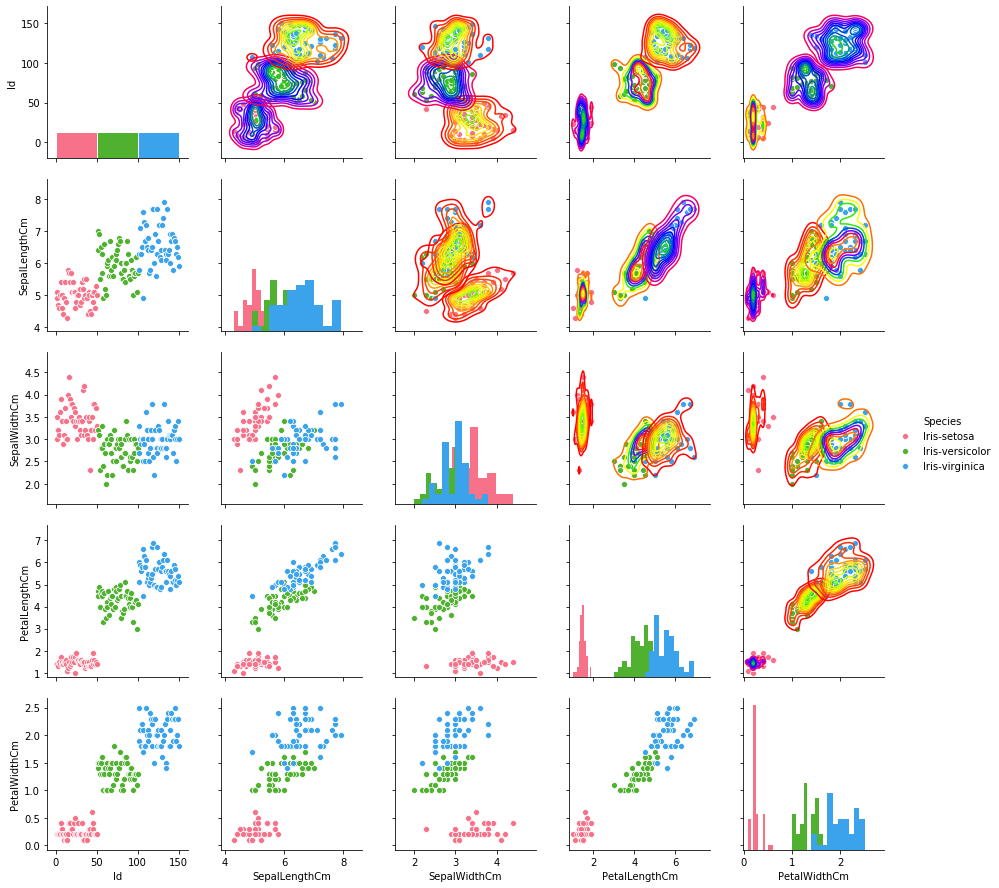

In [36]:
# visualizing relationship between each type of column variable
g=sns.pairplot(df,hue='Species', diag_kind = 'hist',palette = "husl")
# Mapping a density plot to the upper triangle
g = g.map_upper(sns.kdeplot, cmap = 'prism')

In [37]:
#displaying the names of the species in the dataframe before label encoding
print("Iris types:", df["Species"].unique(), sep="\n")

Iris types:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [38]:
#converting labels to numerical form
l=LabelEncoder()     
label=l.fit_transform(df["Species"])

### From now onwards, '0' will denote 'Iris-setosa', '1' will denote 'Iris-versicolor' and '2' will denote 'Iris-virginica'. 

In [39]:
#dropping columns that are not needed (Id and Species)
df=df.drop("Species", axis='columns')
df=df.drop("Id", axis='columns')

In [40]:
#adding the transformed column 
df["Species"]=label
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
115,6.4,3.2,5.3,2.3,2
134,6.1,2.6,5.6,1.4,2
102,7.1,3.0,5.9,2.1,2
117,7.7,3.8,6.7,2.2,2
69,5.6,2.5,3.9,1.1,1
47,4.6,3.2,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0
129,7.2,3.0,5.8,1.6,2
35,5.0,3.2,1.2,0.2,0
70,5.9,3.2,4.8,1.8,1


In [41]:
#displaying the names of the species in the dataframe after label encoding
print("Iris types:", df["Species"].unique(), sep="\n")

Iris types:
[0 1 2]


In [42]:
#dividing the dataset into attributes and labels
x=df.iloc[:, :-1].values
y=df.iloc[:, -1]

#splitting the dataset in 80-20 ratio into training and testing sets
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)

In [43]:
#creating the decision tree classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print('Decision Tree Classifer Successfully Created')

Decision Tree Classifer Successfully Created


In [44]:
#Setting the feature names 
features=list(df.columns[1:])

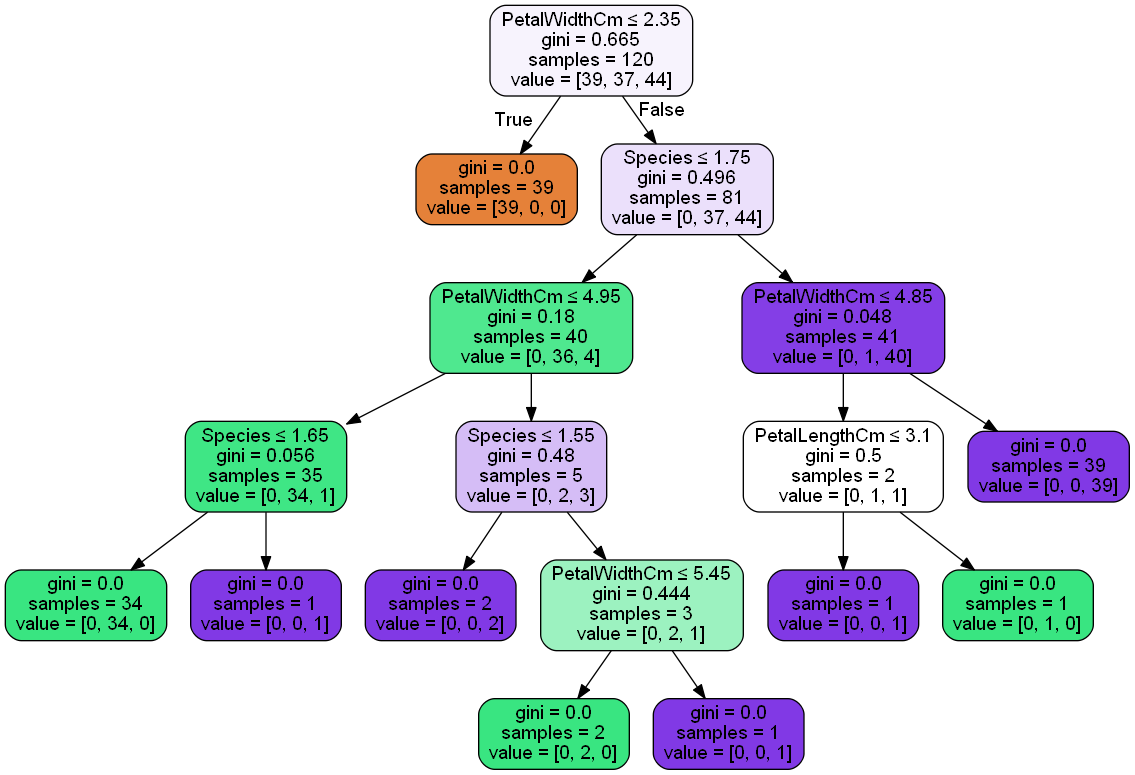

In [45]:
# Applying and plotting the decision tree classifier model to the data using all parameters at once.
d = StringIO()
export_graphviz(dtc, out_file=d, feature_names=features, filled=True, rounded=30,
                special_characters=True)
tree = pydotplus.graph_from_dot_data(d.getvalue())  
Image(tree.create_png())

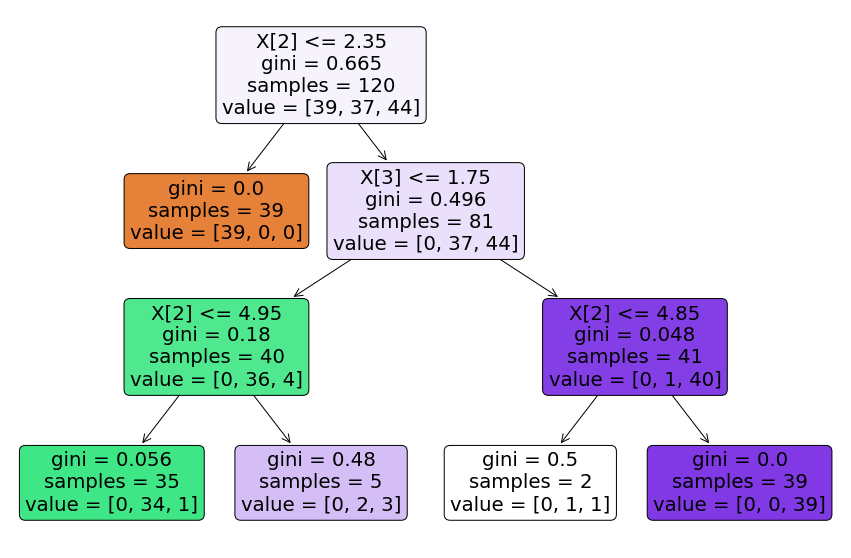

In [46]:
# Applying the decision tree classifier model to the data using all parameters at once, 
# but with a maximum tree depth of 3
depth_3 = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)
# Preparing a plot figure with set size.
plt.figure(figsize = (15,10))
# Plotting the decision tree.
plot_tree(depth_3,rounded = True,filled = True)
# Displaying the tree plot figure.
plt.show()

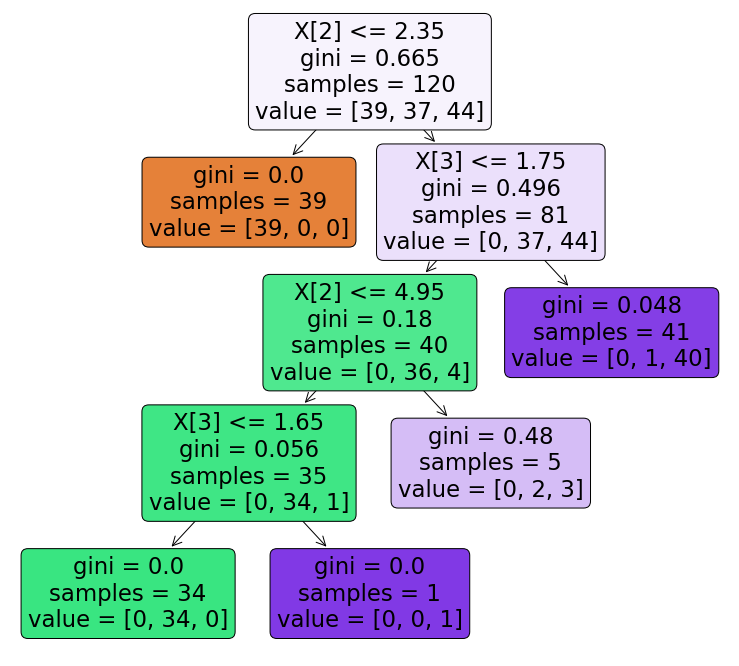

In [47]:
# Applying the model to the data as before, but with a minimum impurity decrease of 0.01
imp_dec_001 = DecisionTreeClassifier(min_impurity_decrease = 0.01).fit(x_train,y_train)
# Preparing a plot figure with set size.
plt.figure(figsize = (13,12))
# Plotting the decision tree.
plot_tree(imp_dec_001,rounded = True,filled = True)
# Displaying the tree plot figure.
plt.show()

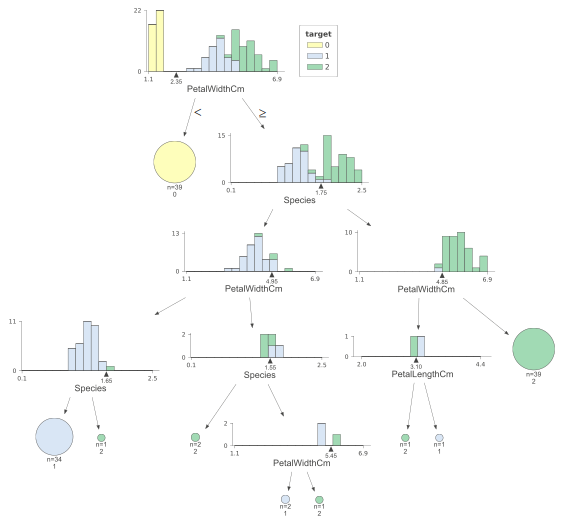

In [48]:
#Plotting the decision tree with the dtreeviz package
viz = dtreeviz(dtc, x_train, y_train, target_name="target",feature_names=features
               ,class_names=list(df["Species"].unique()))
viz

### As the SVG output of the above cell is not being rendered correctly here, I have shown the code snippet along with the SVG output which is being generated on my machine in the cell below. 

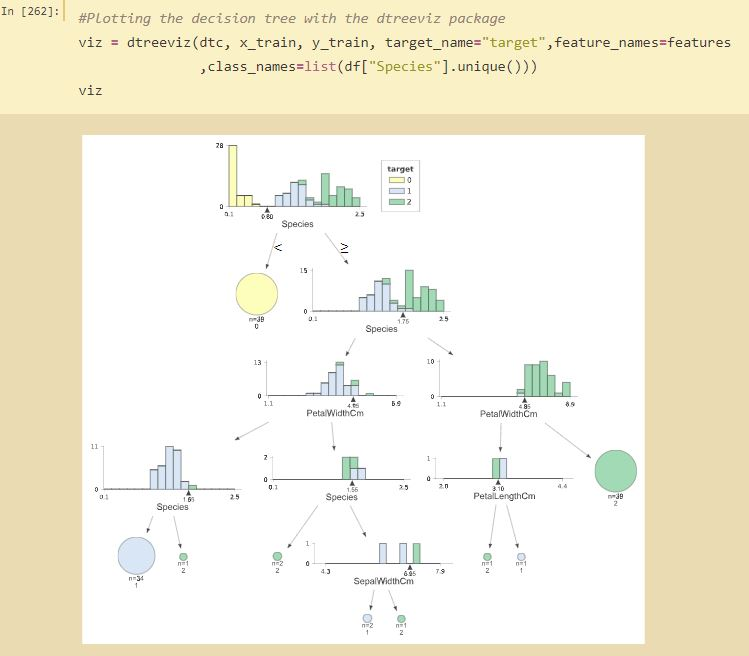

In [49]:
Image(filename='C:/Users/Souvik/Desktop/tsf/plot.JPG')